In [176]:
from models.stage1.vq import VectorQuantize
from utils import load_yaml_param_settings
import numpy as np
import pandas
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
conf_dir = 'configs/config.yaml'

config = load_yaml_param_settings(conf_dir)

In [177]:
# dim = 64
# vq_std = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vqmodel-FordA.ckpt'
# vq_std.load_state_dict(torch.load(dir))

# vq_vib = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vibcreg_0.01_single_vqmodel-FordA.ckpt'
# vq_vib.load_state_dict(torch.load(dir))


# vq_vib_ort = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vibcreg_0.01_orthogonal_single_vqmodel-FordA.ckpt'
# vq_vib_ort.load_state_dict(torch.load(dir))

In [178]:
# #load the vq model
# dir = 'saved_models_idun/vqmodel-UWaveGestureLibraryAll.ckpt'
# vq_std.load_state_dict(torch.load(dir))

# vq_vib = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vibcreg_0.01_single_vqmodel-UWaveGestureLibraryAll.ckpt'
# vq_vib.load_state_dict(torch.load(dir))


# vq_vib_ort = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vibcreg_0.01_orthogonal_single_vqmodel-UWaveGestureLibraryAll.ckpt'
# vq_vib_ort.load_state_dict(torch.load(dir))

In [179]:
# codebook_std = vq_std.codebook.detach()
# codebook_vib = vq_vib.codebook.detach()
# codebook_vib_ort = vq_vib_ort.codebook.detach()


In [182]:
def plot_corr_dist(modelname):
    dim = 64
    vqmodel = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])
    dir = 'saved_models_idun/'+modelname+'.ckpt'
    vqmodel.load_state_dict(torch.load(dir))
    codebook = vqmodel.codebook.detach()
    corr = torch.corrcoef(codebook)
    corr.fill_diagonal_(np.nan)

    corr_f = corr.flatten()
    corr_f = corr[~torch.isnan(corr)]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    ax1.imshow(corr) 
    ax1.title.set_text(f"{modelname}, off diagonal correlation matrix")
    ax2.hist(corr_f, bins=100) 
    ax2.title.set_text(f"{modelname}, correlation distribution")




FileNotFoundError: [Errno 2] No such file or directory: 'saved_models_idun/vibcreg_0.01_orthogonal_single_vqmodel-FordB.ckpt'

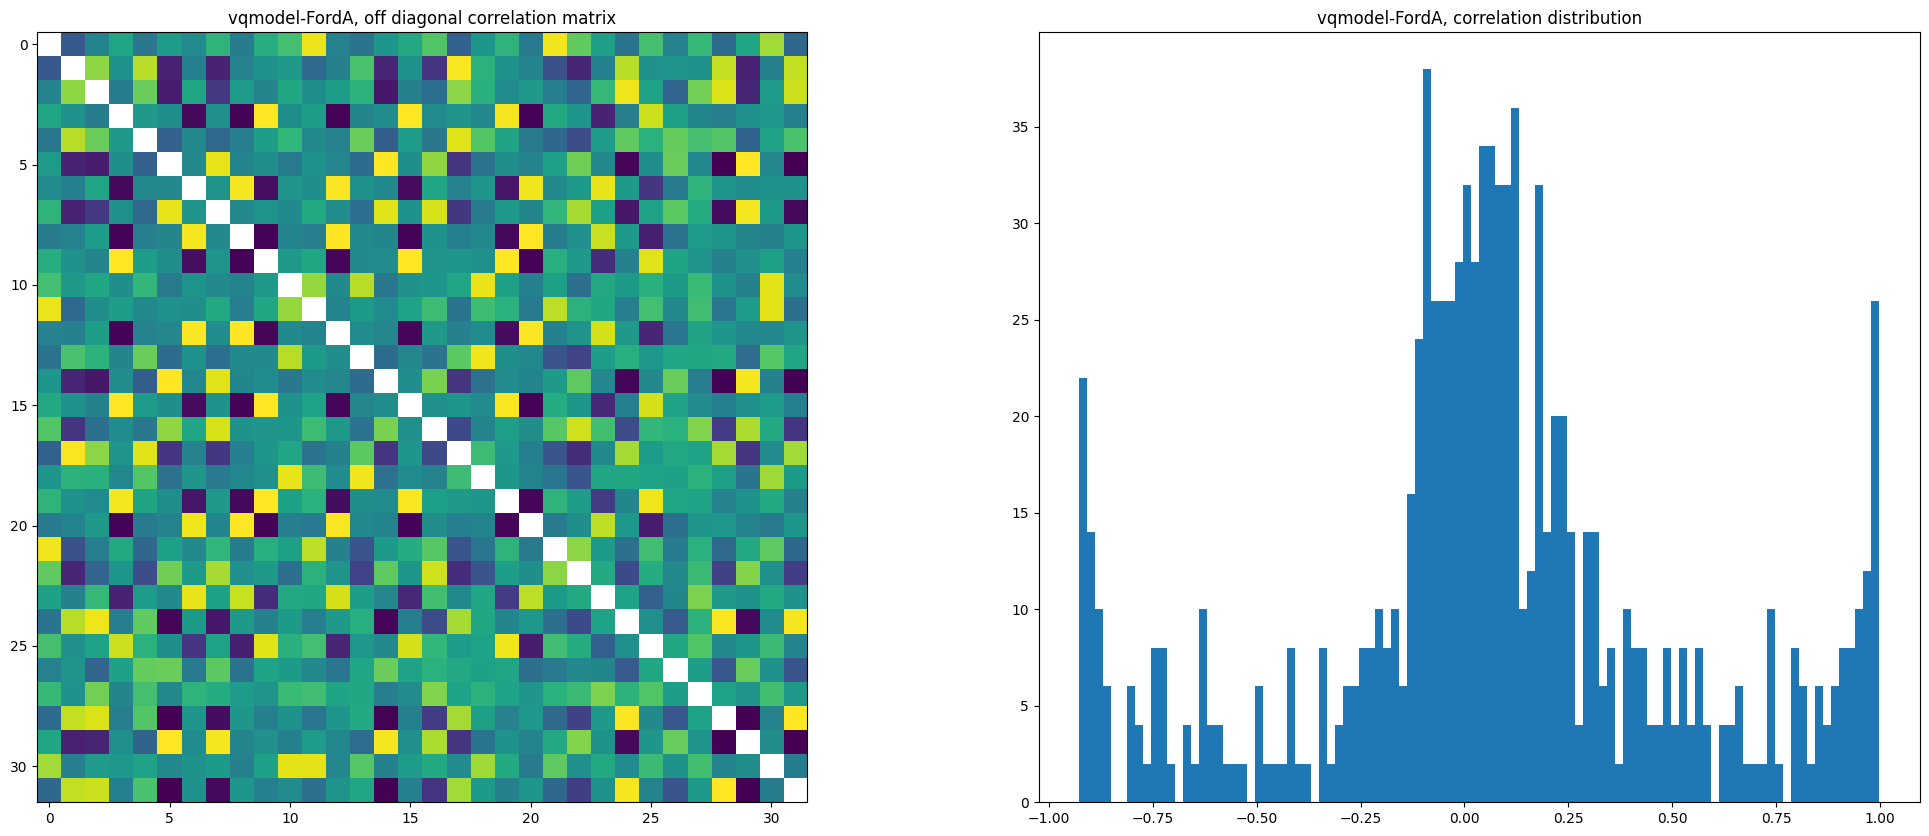

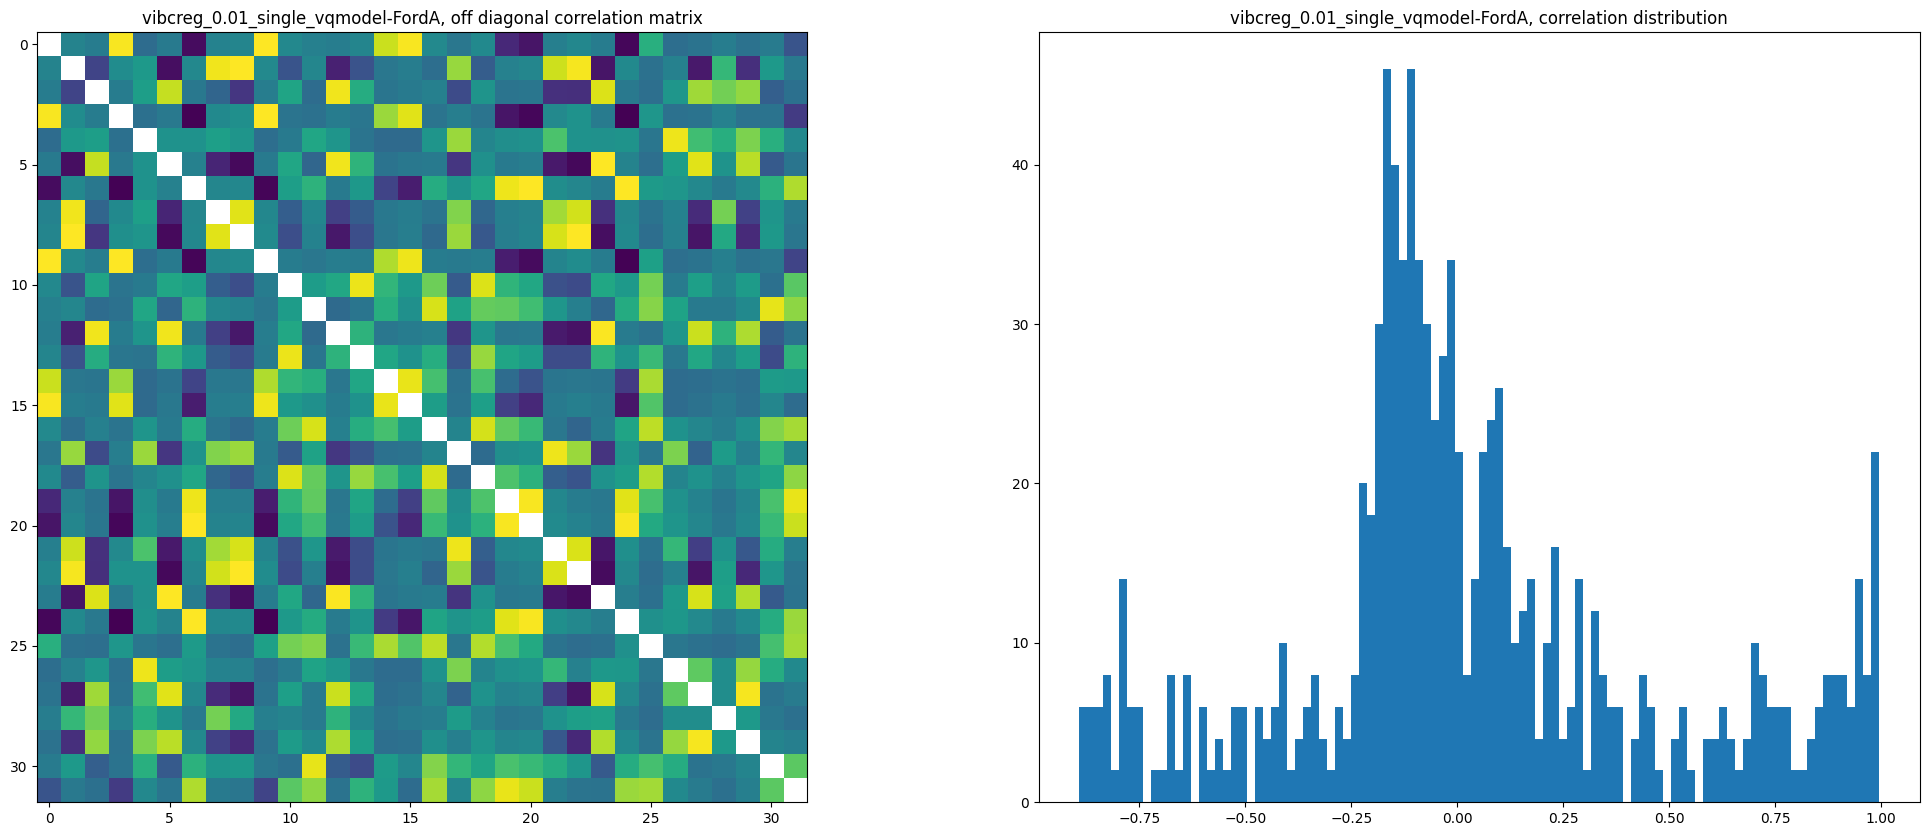

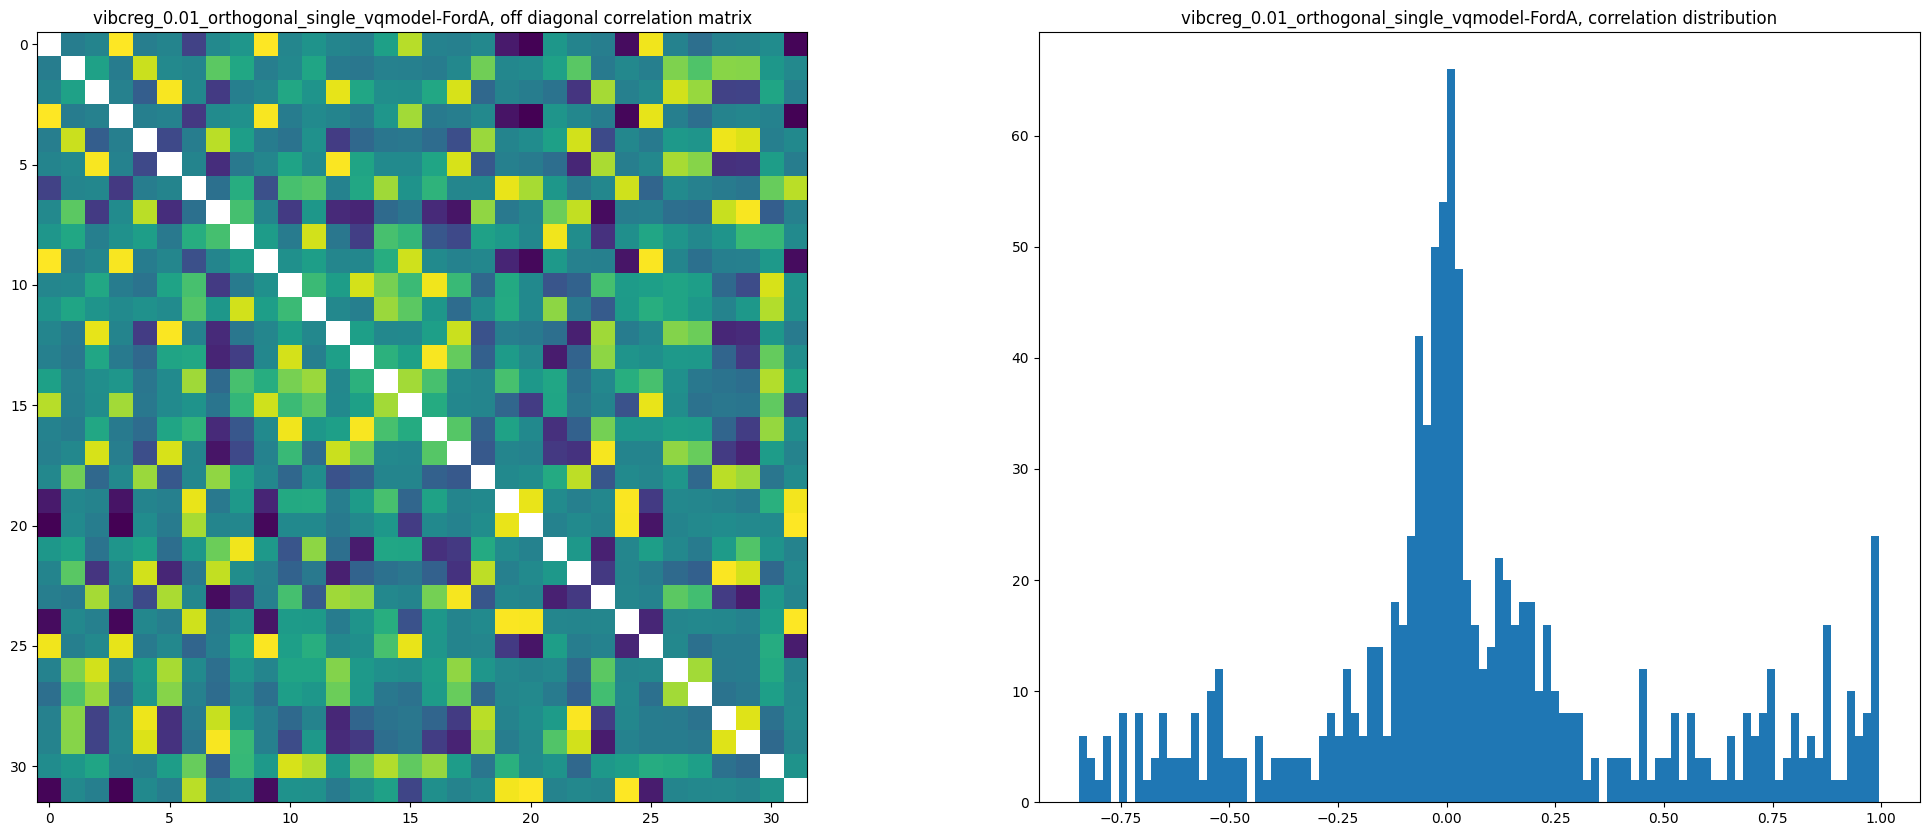

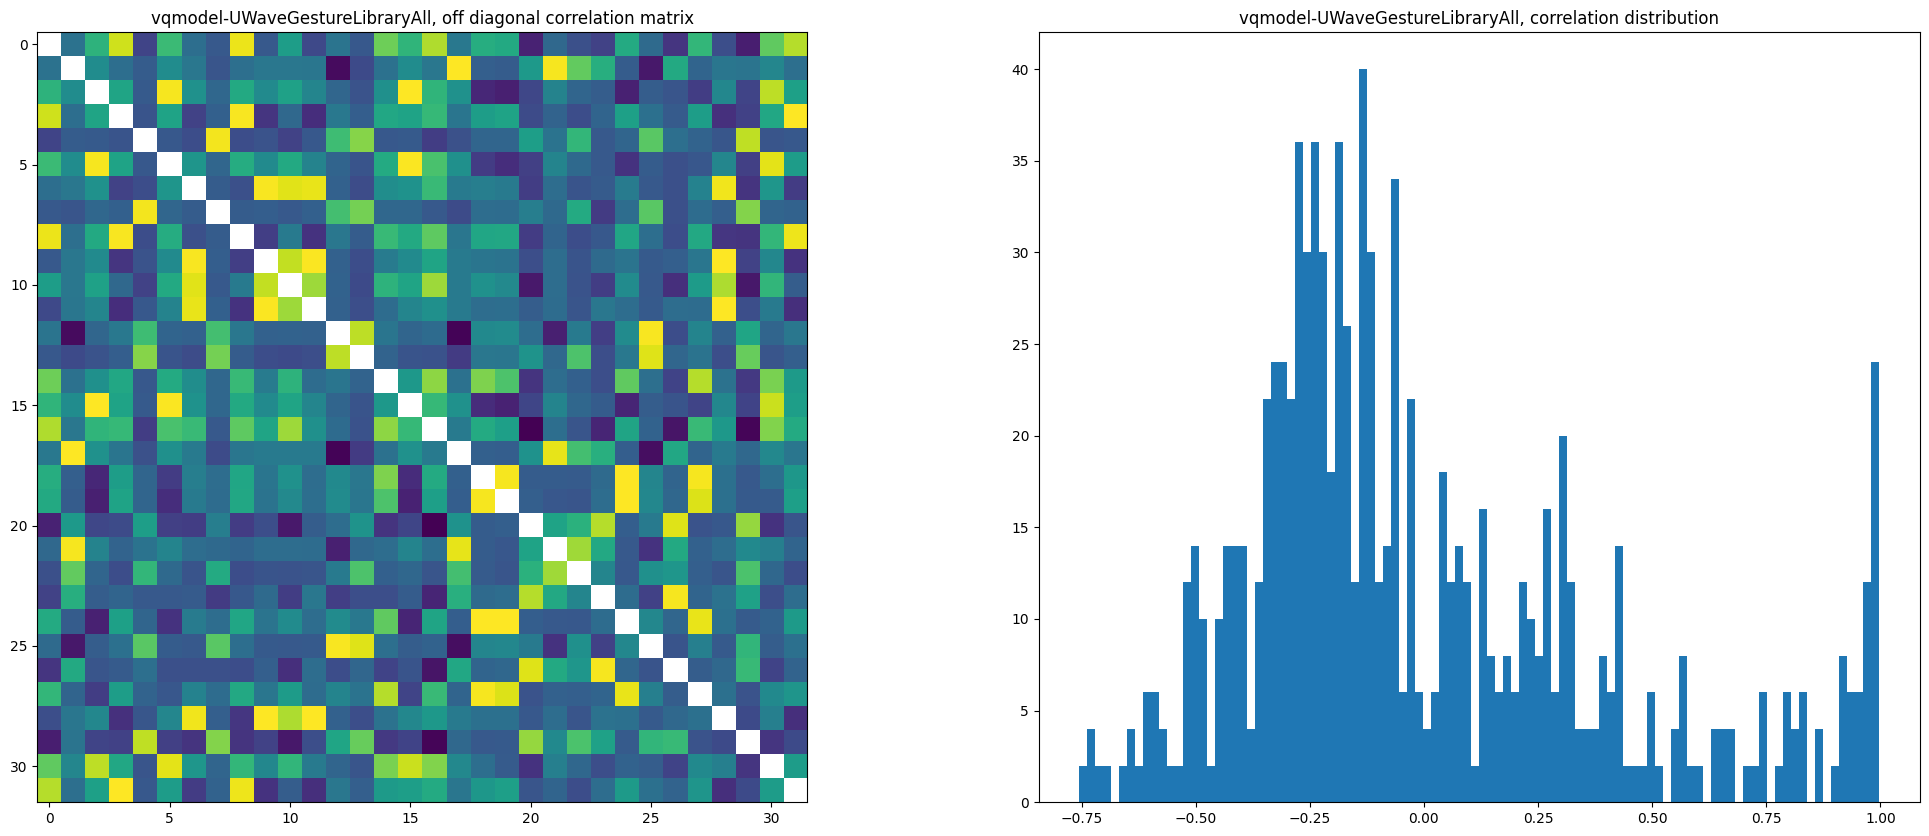

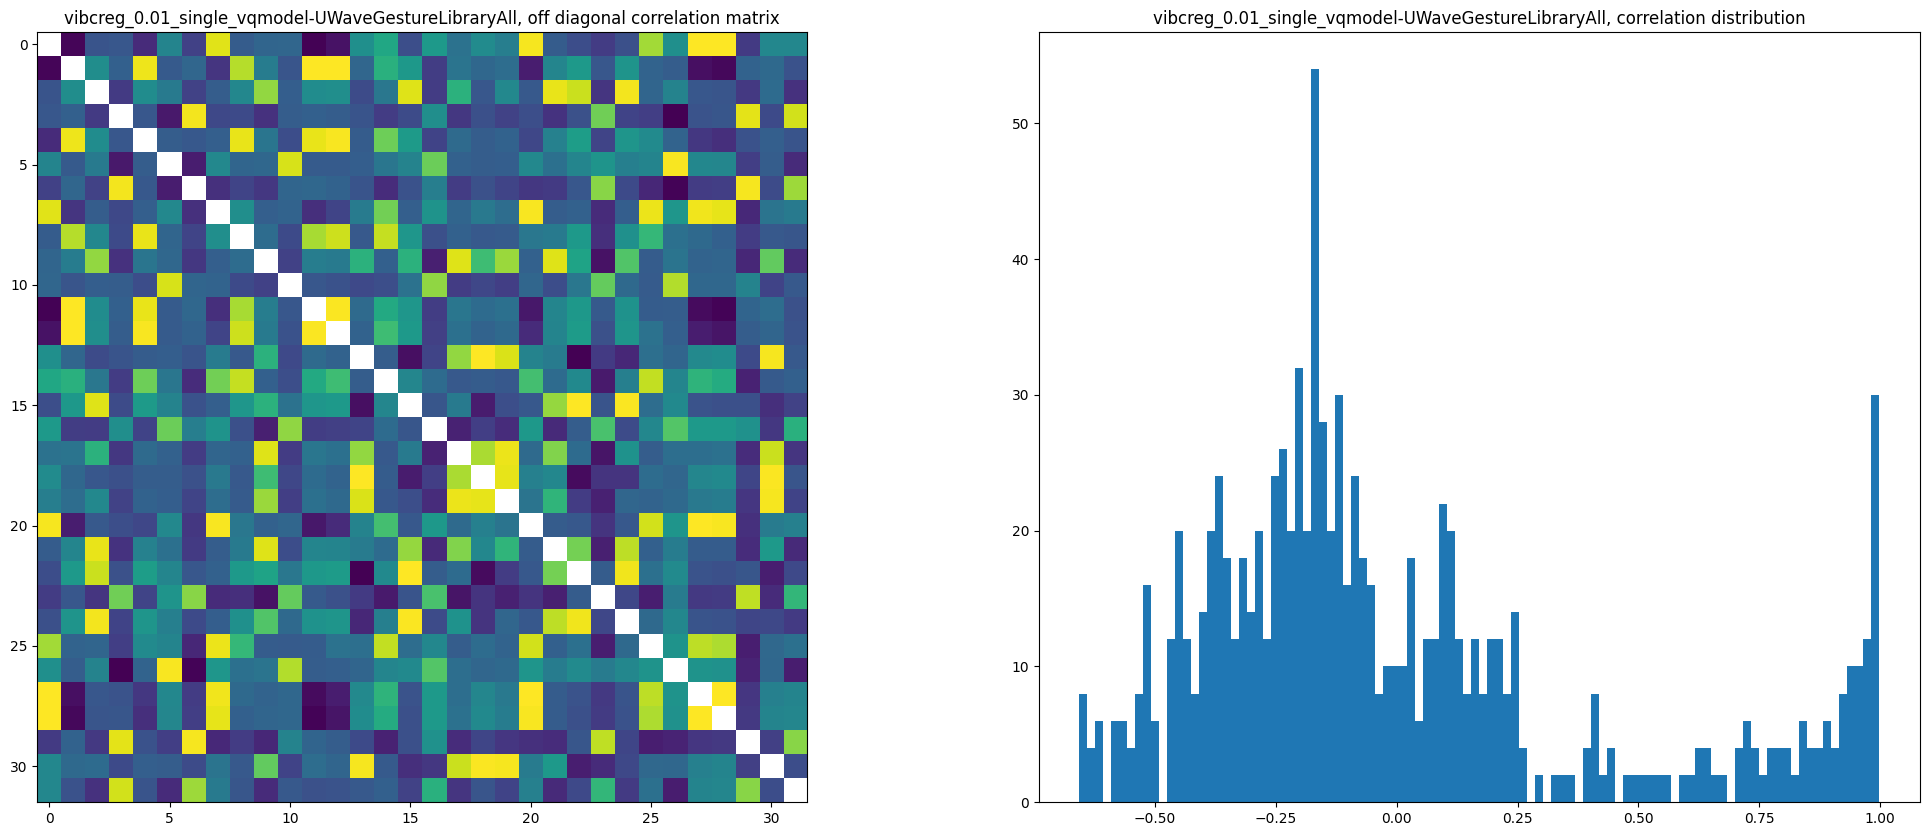

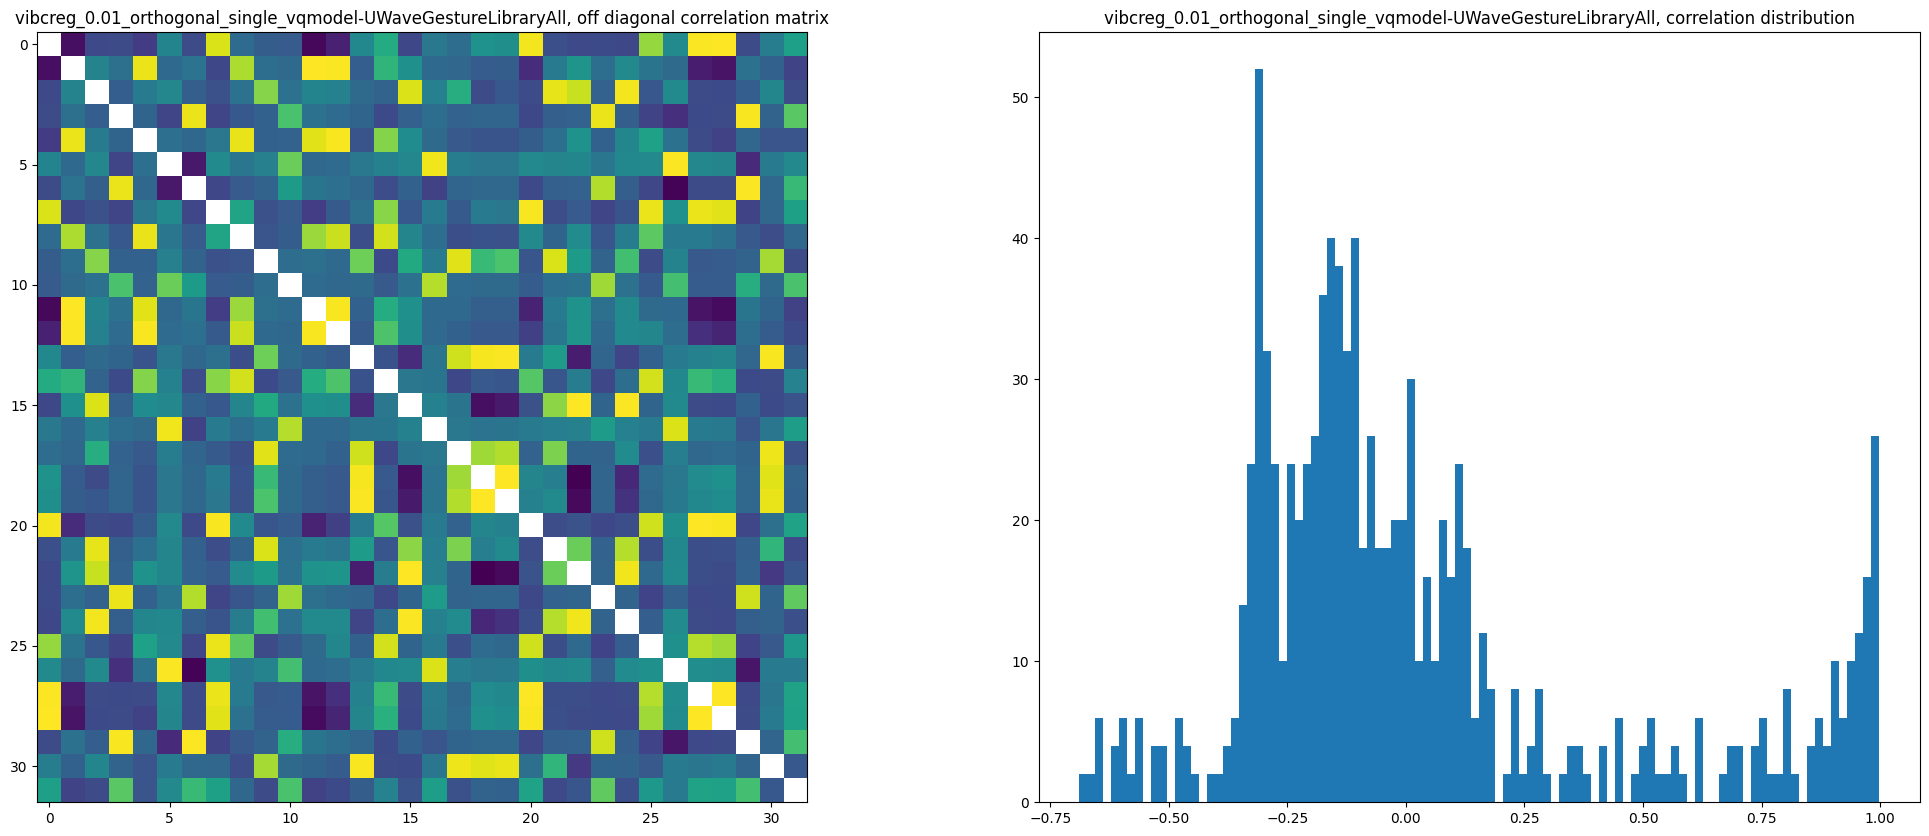

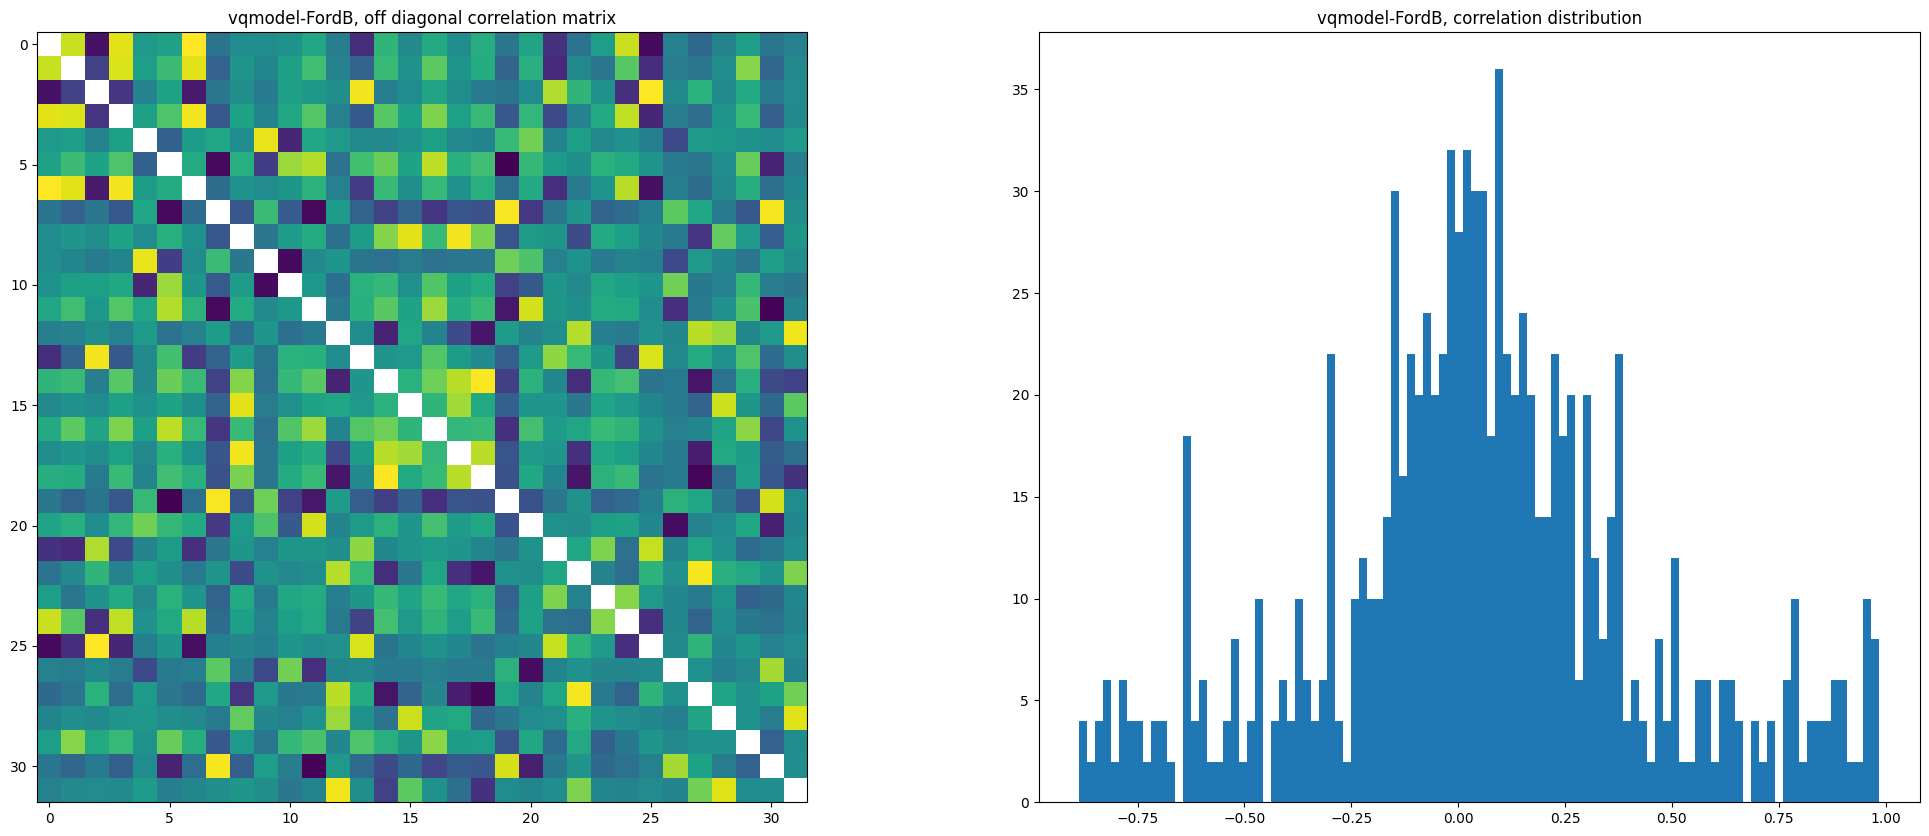

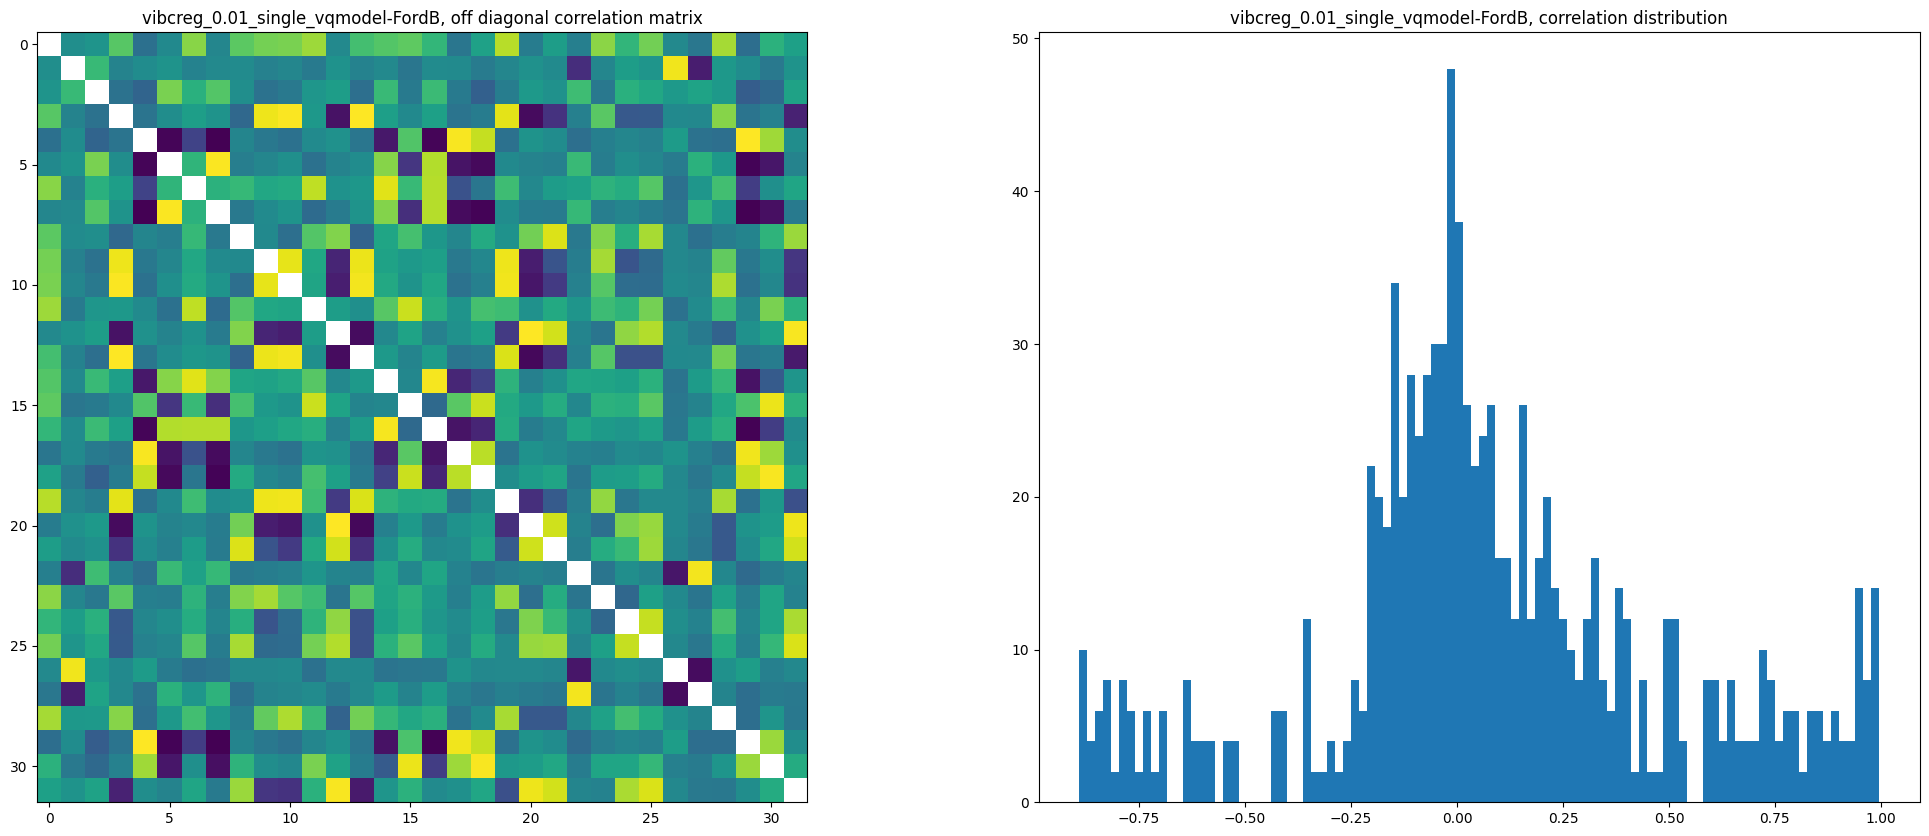

In [187]:
modelnames = ['vqmodel-FordA', 'vibcreg_0.01_single_vqmodel-FordA', 'vibcreg_0.01_orthogonal_single_vqmodel-FordA',
              'vqmodel-UWaveGestureLibraryAll', 'vibcreg_0.01_single_vqmodel-UWaveGestureLibraryAll', 'vibcreg_0.01_orthogonal_single_vqmodel-UWaveGestureLibraryAll',
              'vqmodel-FordB', 'vibcreg_0.01_single_vqmodel-FordB', 'vibcreg_0.01_orthogonal_single_vqmodel-FordB'
              ]

# modelnames = ['vqmodel-FordA', 'vibcreg_0.01_single_vqmodel-FordA', 'vibcreg_0.01_orthogonal_single_vqmodel-FordA'
#               ]

for modelname in modelnames: 
    plot_corr_dist(modelname)

In [188]:

# corr_std = torch.corrcoef(codebook_std)
# corr_std.fill_diagonal_(np.nan)

# corr_vib = torch.corrcoef(codebook_vib)
# corr_vib.fill_diagonal_(np.nan)

# corr_vib_ort = torch.corrcoef(codebook_vib_ort)
# corr_vib_ort.fill_diagonal_(np.nan)

# plt.imshow(corr_std)
# plt.colorbar()
# plt.title("vqmodel-FordA")
# plt.show()
# plt.close()
# plt.imshow(corr_vib)
# plt.colorbar()

# plt.title("vibcreg_0.01_single_vqmodel-FordA")
# plt.show()
# plt.close()
# plt.imshow(corr_vib_ort)
# plt.colorbar()
# plt.title("vibcreg_0.01_orthogonal_single_vqmodel-FordA")
# plt.show()

In [154]:

# corr_std = corr_std.flatten()
# corr_std = corr_std[~torch.isnan(corr_std)]


# corr_vib = corr_vib.flatten()
# corr_vib = corr_vib[~torch.isnan(corr_vib)]

# corr_vib_ort = corr_vib_ort.flatten()
# corr_vib_ort = corr_vib_ort[~torch.isnan(corr_vib_ort)]



In [155]:
logits = torch.tensor([1.0,3.2,12.0])
sampled_ids = torch.distributions.categorical.Categorical(
                logits=logits
            )
torch.exp(sampled_ids.logits)

tensor([1.6699e-05, 1.5071e-04, 9.9983e-01])

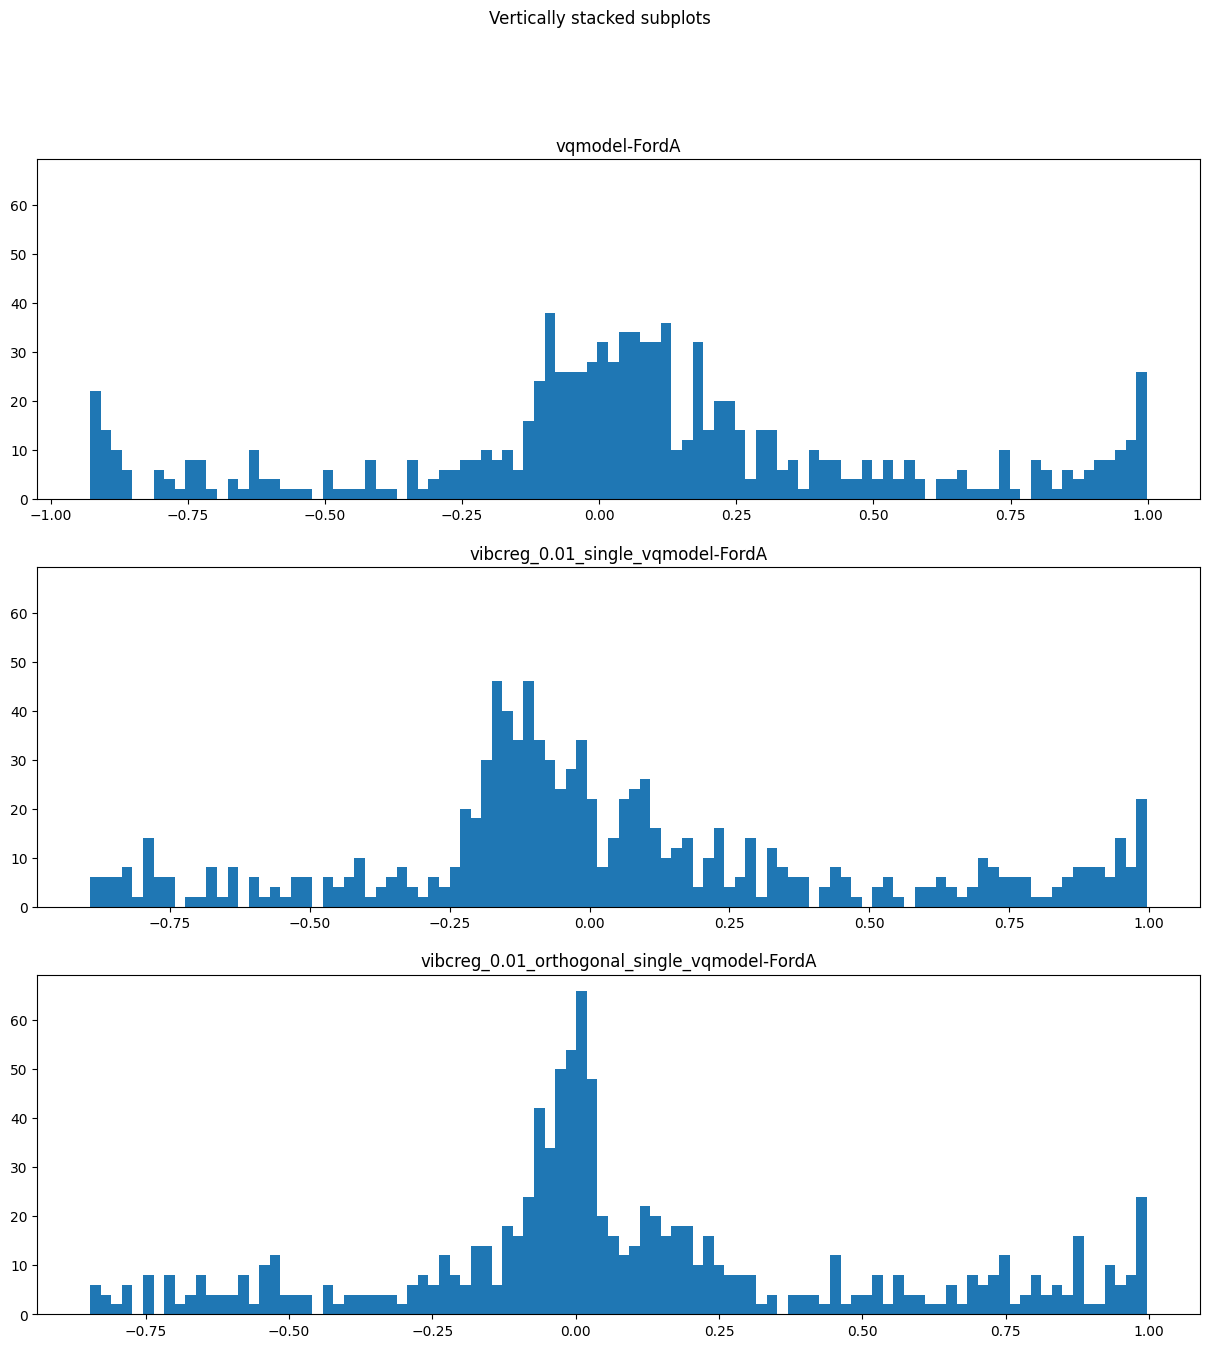

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey= True, figsize=(15, 15))
fig.suptitle('Vertically stacked subplots')
ax1.hist(corr_std, bins=100) 
ax1.title.set_text('vqmodel-FordA')
ax2.hist(corr_vib, bins=100) 
ax2.title.set_text('vibcreg_0.01_single_vqmodel-FordA')
ax3.hist(corr_vib_ort, bins=100) 
ax3.title.set_text('vibcreg_0.01_orthogonal_single_vqmodel-FordA')


# plt.hist(corr_std, bins=100) 
# plt.show()
# plt.close()

# plt.hist(corr_vib, bins=100) 
# plt.show()
# plt.close()

# plt.hist(corr_vib_ort, bins=100)  
# plt.show()
# plt.close()